In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d markdaniellampa/fish-dataset

100% 1.58G/1.58G [00:19<00:00, 110MB/s]
100% 1.58G/1.58G [00:19<00:00, 87.9MB/s]


In [3]:
from zipfile import ZipFile
dataset = '/content/fish-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
from google.colab.patches import cv2_imshow

In [5]:
train_folder=os.listdir('/content/FishImgDataset/train')
print(train_folder)
print(len(train_folder))

['Silver Perch', 'Goby', 'Knifefish', 'Bangus', 'Mullet', 'Janitor Fish', 'Long-Snouted Pipefish', 'Gold Fish', 'Freshwater Eel', 'Mudfish', 'Tenpounder', 'Indo-Pacific Tarpon', 'Jaguar Gapote', 'Silver Barb', 'Pangasius', 'Grass Carp', 'Fourfinger Threadfin', 'Green Spotted Puffer', 'Snakehead', 'Tilapia', 'Gourami', 'Glass Perchlet', 'Silver Carp', 'Black Spotted Barb', 'Big Head Carp', 'Scat Fish', 'Catfish', 'Climbing Perch', 'Perch', 'Indian Carp', 'Mosquito Fish']
31


In [6]:
data=[]

In [7]:
for fish_type in train_folder:
  folder_path='/content/FishImgDataset/train/'+fish_type
  fish_folder=os.listdir(folder_path)
  l=len(fish_folder)
  for fish in fish_folder:
    img_path=folder_path+'/'+fish
    img_pillow=Image.open(img_path)
    img_color=img_pillow.convert('RGB')
    img_resize=img_color.resize((64,64))
    img_arr=np.array(img_resize)
    data.append([img_arr,fish_type])

In [8]:
len(data)

8811

In [9]:
x=[]
y=[]
for i,j in data:
  x.append(i)
  y.append(j)

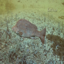

In [10]:
cv2_imshow(x[0])

In [11]:
x=np.array(x)
y=np.array(y)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [13]:
print(len(x_train),len(x_test),len(y_train),len(y_test))

7929 882 7929 882


In [14]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [15]:
t=np.unique(y_train)
print(t)
print(len(t))

['Bangus' 'Big Head Carp' 'Black Spotted Barb' 'Catfish' 'Climbing Perch'
 'Fourfinger Threadfin' 'Freshwater Eel' 'Glass Perchlet' 'Goby'
 'Gold Fish' 'Gourami' 'Grass Carp' 'Green Spotted Puffer' 'Indian Carp'
 'Indo-Pacific Tarpon' 'Jaguar Gapote' 'Janitor Fish' 'Knifefish'
 'Long-Snouted Pipefish' 'Mosquito Fish' 'Mudfish' 'Mullet' 'Pangasius'
 'Perch' 'Scat Fish' 'Silver Barb' 'Silver Carp' 'Silver Perch'
 'Snakehead' 'Tenpounder' 'Tilapia']
31


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)

In [17]:
r=np.unique(y_train)
print(r)
print(len(r))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
31


In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
num_of_classes=32
model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(64,64,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='softmax'))

In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train_scaled,y_train,epochs=500,validation_split=0.1)

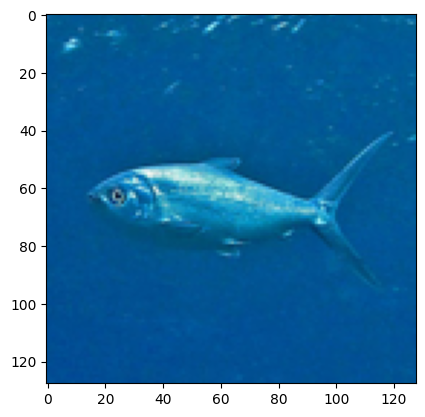

In [35]:
img_path='/content/FishImgDataset/train/Bangus/Bangus 1.jpg'
img_pillow1=Image.open(img_path)
img_color1=img_pillow1.convert('RGB')
img_resize1=img_color1.resize((128,128))
img_arr1=np.array(img_resize1)
plt.imshow(img_arr1)

In [36]:
img_pillow=Image.open(img_path)
img_color=img_pillow.convert('RGB')
img_resize=img_color.resize((64,64))
img_arr=np.array(img_resize)
img_scaled=img_arr/255
img_reshape=np.reshape(img_scaled,[1,64,64,3])
prediction=model.predict(img_reshape)
output=np.argmax(prediction)
if(output==0):
  print('Bangus Fish')
elif(output==1):
  print('Big Head Carp Fish')
elif(output==2):
  print('Black Spotted Barb Fish')
elif(output==3):
  print('Catfish Fish')
elif(output==4):
  print('Climbing Perch Fish')
elif(output==5):
  print('Fourfinger Threadfin Fish')
elif(output==6):
  print('Freshwater Eel Fish')
elif(output==7):
  print('Glass Perchlet Fish')
elif(output==8):
  print('Goby Fish')
elif(output==9):
  print('Gold Fish')
elif(output==10):
  print('Gourami Fish')
elif(output==11):
  print('Grass Carp Fish')
elif(output==12):
  print('Green Spotted Puffer Fish')
elif(output==13):
  print('Indian Carp Fish')
elif(output==14):
  print('Indo-Pacific Tarpon Fish')
elif(output==15):
  print('Jaguar Gapote Fish')
elif(output==16):
  print('Janitor Fish Fish')
elif(output==17):
  print('Knifefish Fish')
elif(output==18):
  print('Long-Snouted Pipefish Fish')
elif(output==19):
  print('Mosquito Fish')
elif(output==20):
  print('Mudfish')
elif(output==21):
  print('Mullet Fish')
elif(output==22):
  print('Pangasius Fish')
elif(output==23):
  print('Perch Fish')
elif(output==24):
  print('Scat Fish')
elif(output==25):
  print('Silver Barb Fish')
elif(output==26):
  print('Silver Carp Fish')
elif(output==27):
  print('Silver Perch Fish')
elif(output==28):
  print('Snakehead Fish')
elif(output==29):
  print('Tenpounder Fish')
elif(output==30):
  print('Tilapia Fish')

1/1 [==============================] - 0s 24ms/step
Bangus Fish
